# Airline Passenger Satisfaction

## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Importing data

In [2]:
airlines = pd.read_csv("data/airline-train.csv")

## Understanding the data

In [3]:
airlines.shape

(103904, 25)

In [4]:
airlines.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
airlines.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
airlines.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

## Data cleaning

In [8]:
# Droping columns "Unnamed: 0" because it doesn't increment in my analysis:
airlines.drop(columns="Unnamed: 0", inplace=True)

# Reseting index for "id" since these values are unique for each row:
airlines.set_index("id", inplace=True)

# Gender : 1 for Female and 0 for Male
#airlines.Gender = airlines.Gender.apply(lambda x: 1 if x=="Female" else 0)

airlines.head(7)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [15]:
airlines.sort_values(by="id",inplace=True)
airlines

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [16]:
airlines["Customer Type"].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [19]:
# Cleaning column "Customer Type" to indicate only if customer is loyal or not
airlines.rename(columns={"Customer Type":"Loyal"}, inplace=True)
airlines["Loyal"] = airlines["Loyal"].apply(lambda x: 1 if x=='Loyal Customer' else 0)
airlines

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,Female,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,Male,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [22]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
airlines.rename(columns={"satisfaction":"Satisfied"}, inplace=True)
airlines["Satisfied"] = airlines["Satisfied"].apply(lambda x: 1 if x=='satisfied' else 0)
airlines

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied
id,,,,,,,,,,,,,,,,,,,,,
1,Male,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
2,Female,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
3,Male,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
4,Male,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
5,Female,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,0
129875,Female,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,0
129878,Male,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,0


# Basic Data Visualizations for further understanding

<AxesSubplot:>

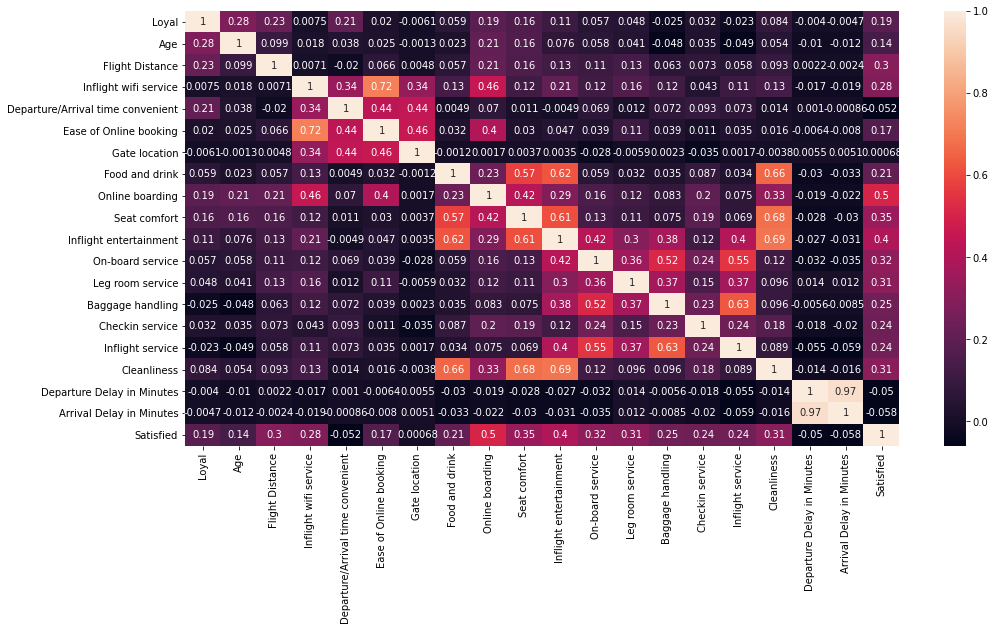

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(airlines.corr(),annot=True,)

In [ ]:
sns.pairplot(airlines)